## Entrenamiento de YOLOv11 con las imágenes GST (no correr)

In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

rf = Roboflow(api_key="7Hz3eeowofFbvAHC6OmK")
project = rf.workspace("tpfinalvisionwildlife").project("tp_final_wildlife_t")
version = project.version(2)
dataset = version.download("yolov11")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to tp_final_wildlife_t-2 in yolov11:: 100%|██████████| 340/340 [00:00<00:00, 4594.26it/s]


## Custom Training

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.49 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/tp_final_wildlife_t-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, em

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [11]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


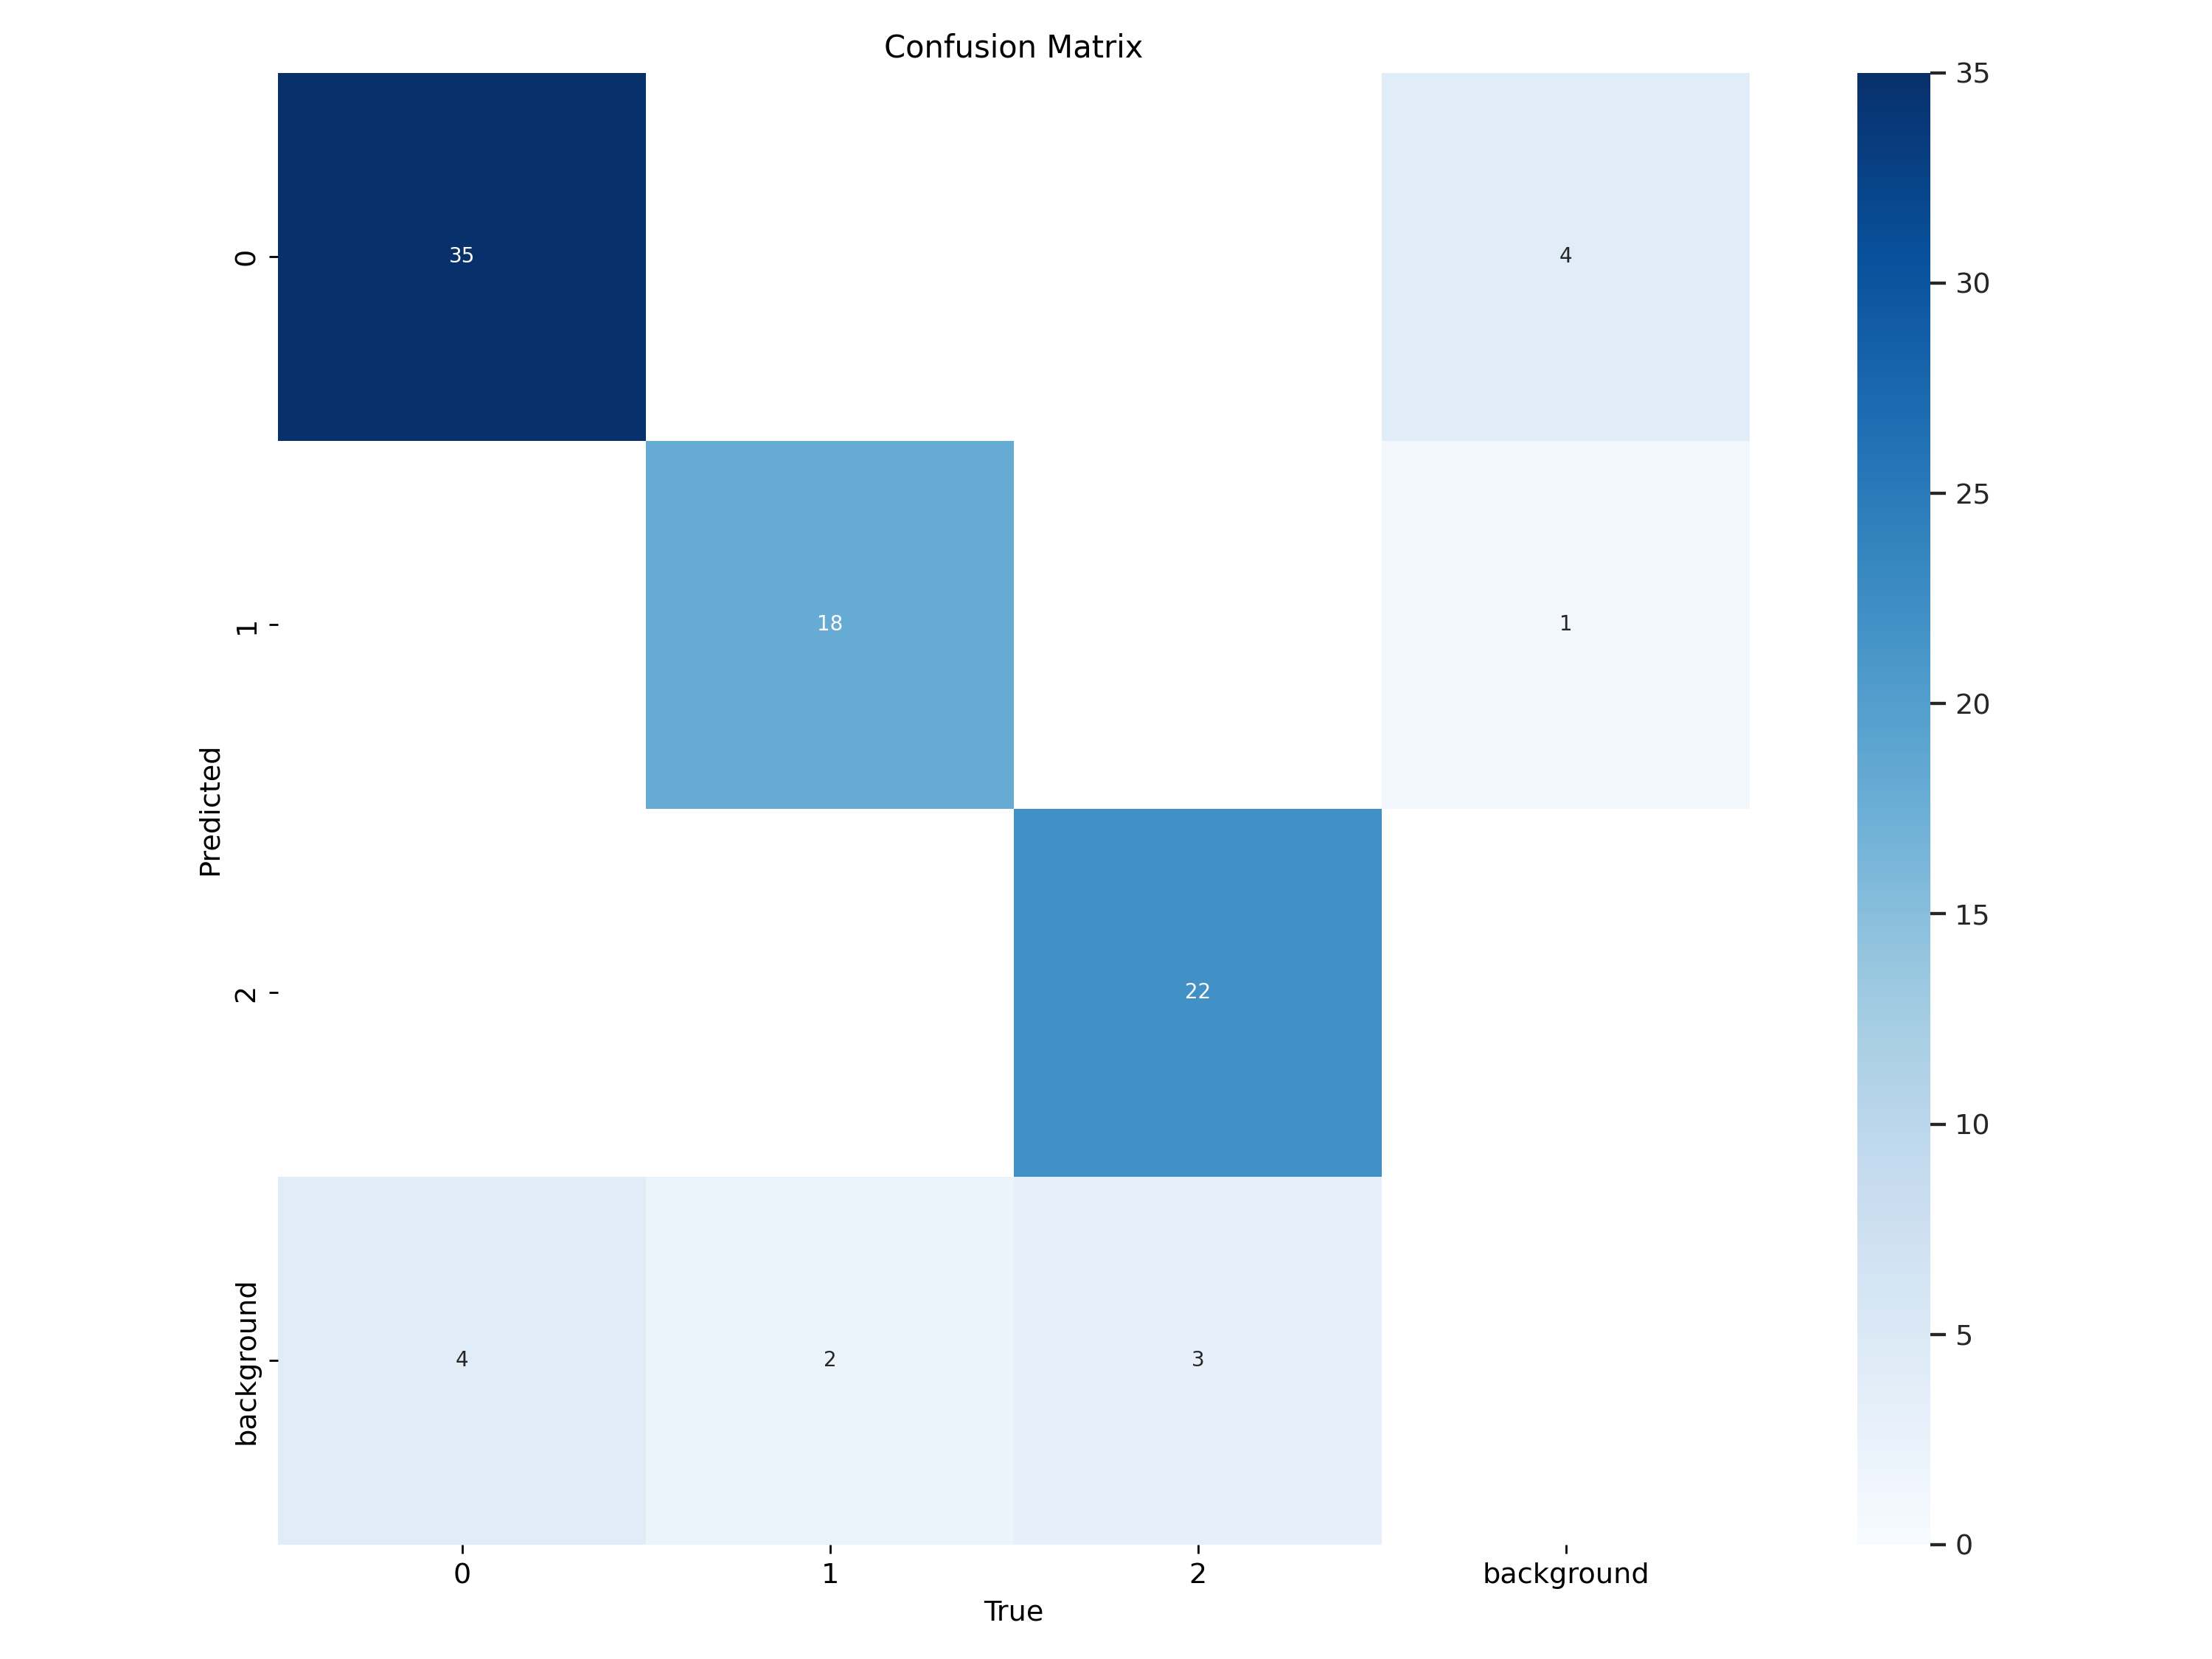

In [13]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

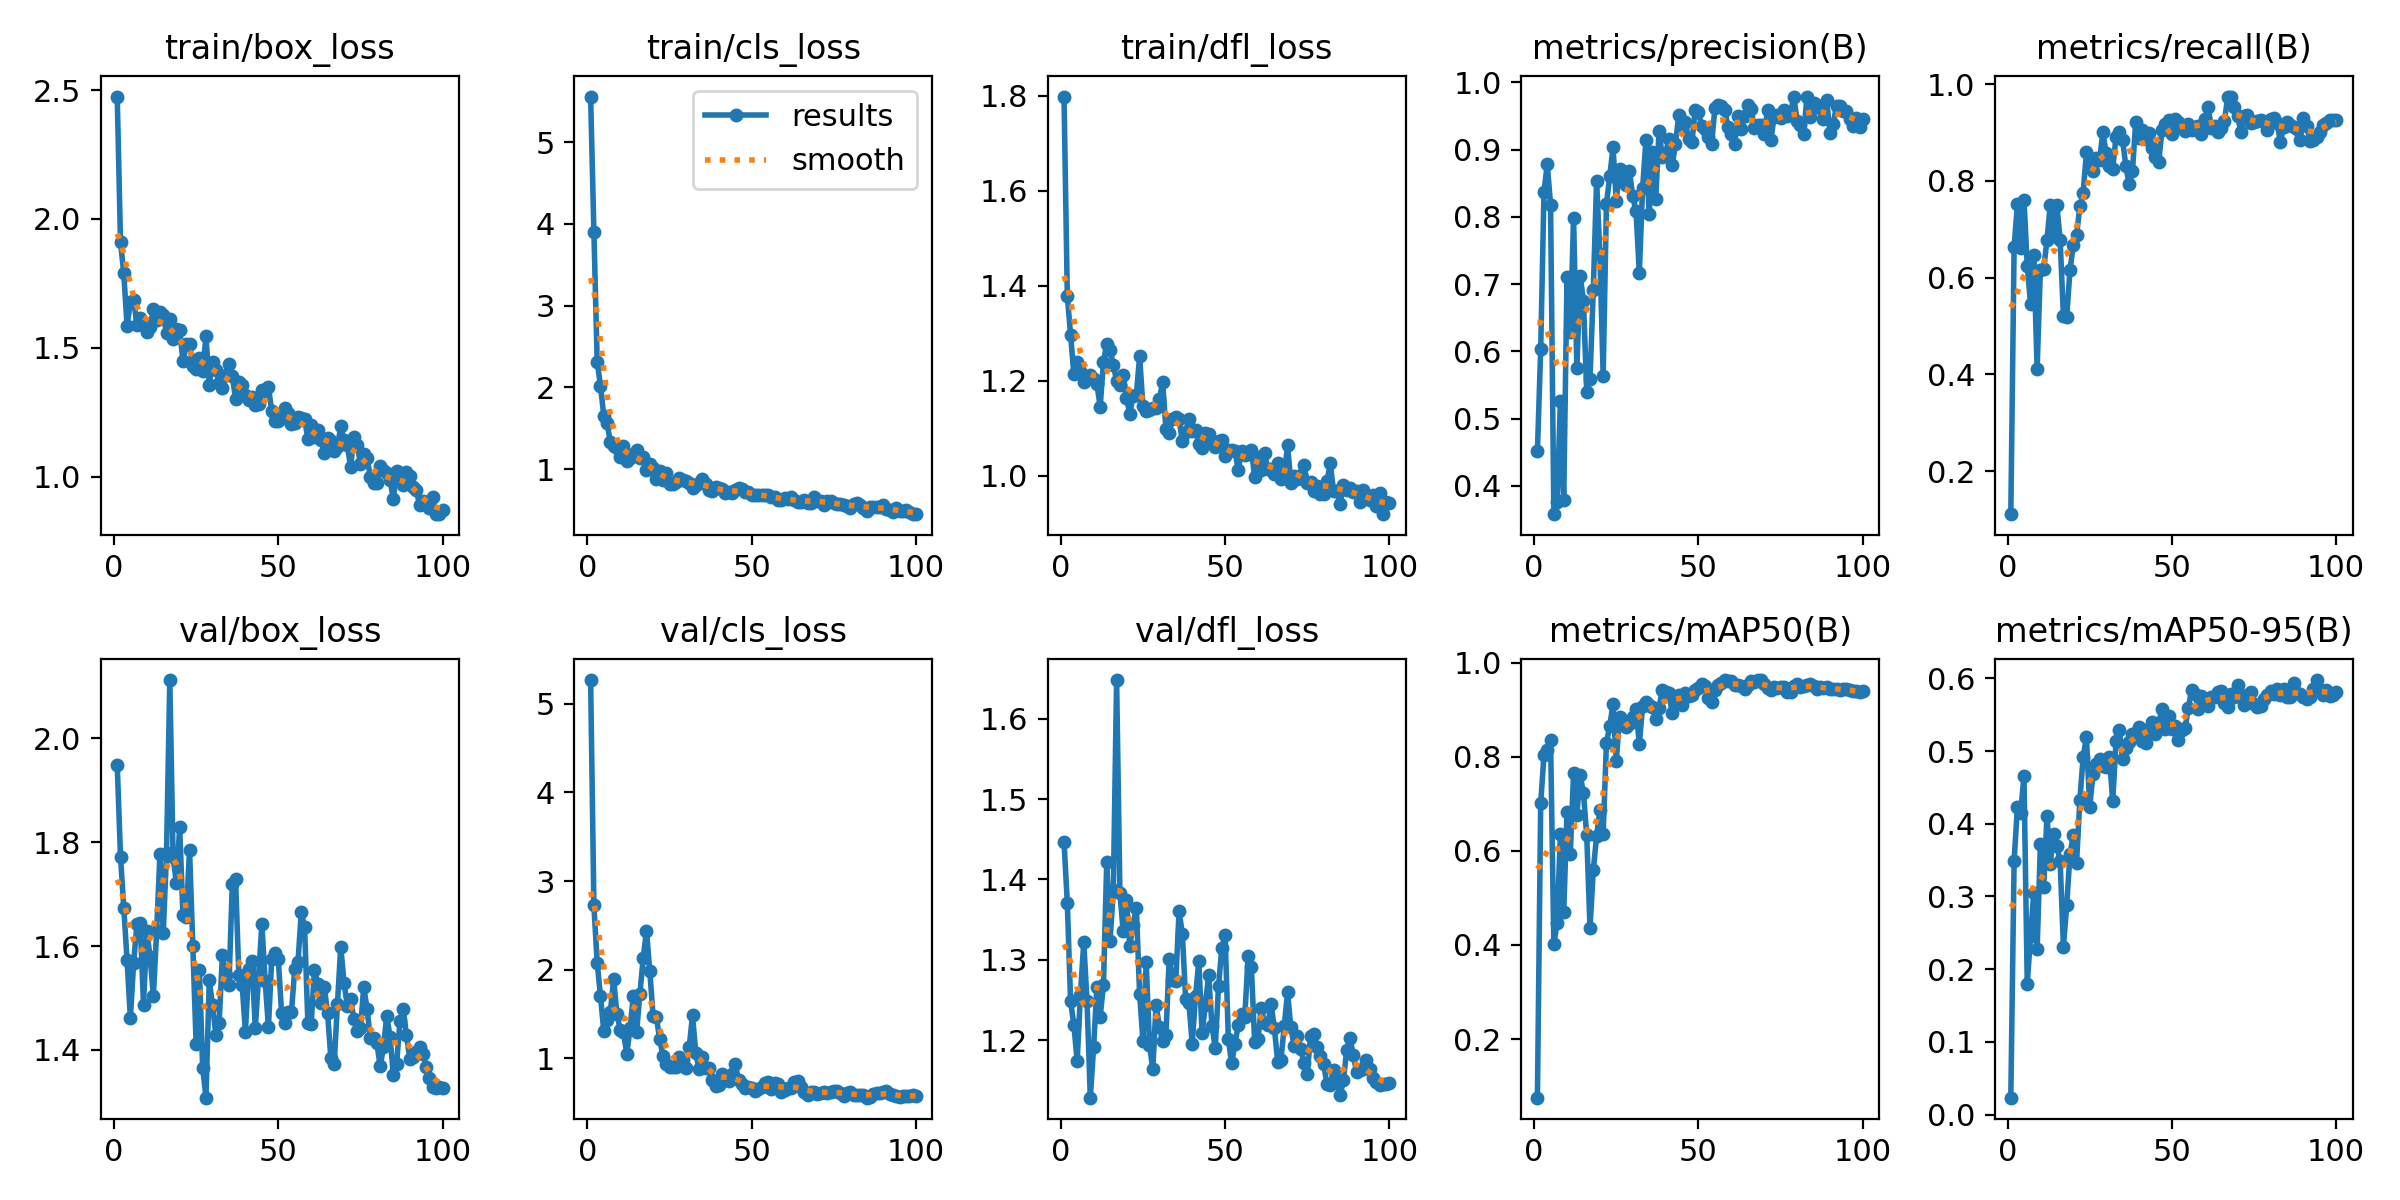

In [15]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

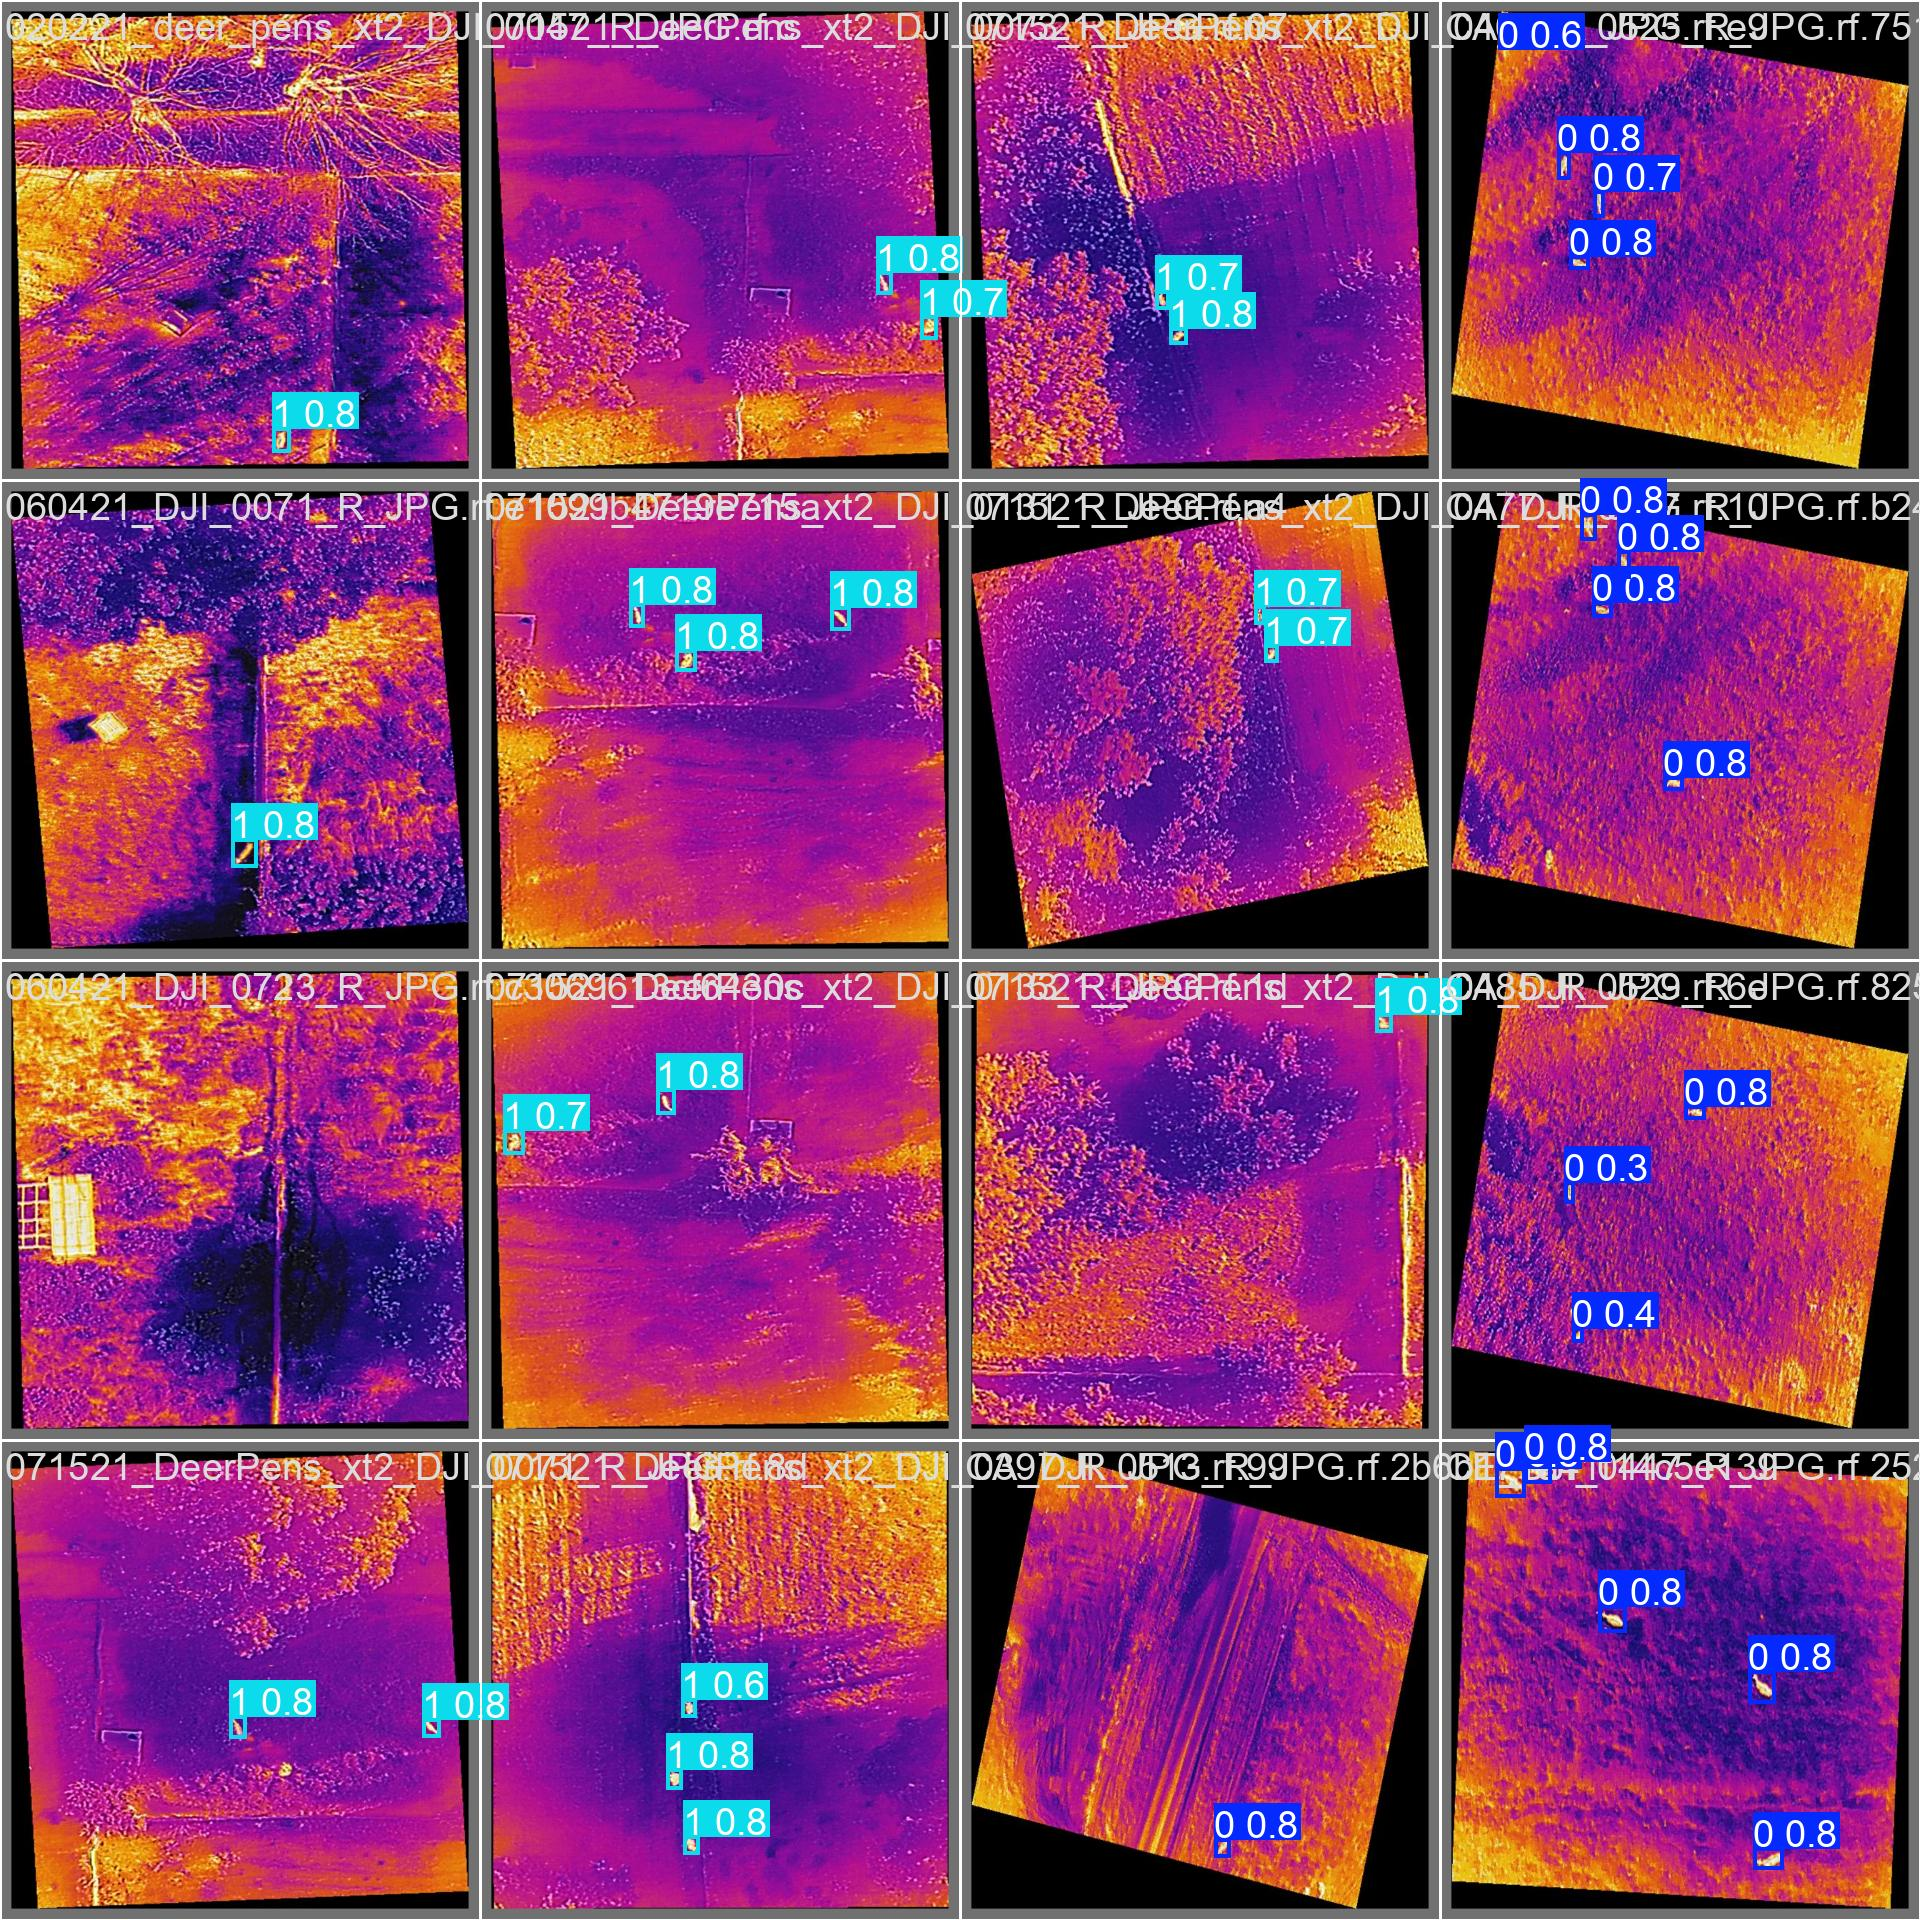

In [16]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [17]:
!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/tp_final_wildlife_t-2/valid/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100% 33/33 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:01<00:00,  1.53it/s]
                   all         33         84      0.958      0.892      0.944      0.589
                     0         13         39      0.944      0.861      0.973      0.566
                     1         11         20      0.949      0.934      0.909      0.565
                     2          9         25      0.981       0.88       0.95      0.634
Speed: 2.5ms preprocess, 20.1ms inference, 0.0ms loss, 25.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with custom model

In [19]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs

image 1/16 /content/datasets/tp_final_wildlife_t-2/test/images/060421_DJI_0725_R_JPG.rf.61b5bb21ead9fe86c4d074036a5e9cfe.jpg: 640x640 (no detections), 16.0ms
image 2/16 /content/datasets/tp_final_wildlife_t-2/test/images/071521_DeerPens_xt2_DJI_0369_R_JPG.rf.5118412d9928db267d1f9e647851c90a.jpg: 640x640 1 1, 15.7ms
image 3/16 /content/datasets/tp_final_wildlife_t-2/test/images/071521_DeerPens_xt2_DJI_0471_R_JPG.rf.2218312639cf1791658f5e7024a2bb1b.jpg: 640x640 2 1s, 15.6ms
image 4/16 /content/datasets/tp_final_wildlife_t-2/test/images/071521_DeerPens_xt2_DJI_0487_R_JPG.rf.f25a16de96d86b7c5c48d9d1bdb7f04f.jpg: 640x640 1 1, 15.5ms
image 5/16 /content/datasets/tp_final_wildlife_t-2/test/images/071521_DeerPens_xt2_DJI_0555_R_JPG.rf.9e03253426498613910dd6c908be3774.jpg: 640x640 1 1, 15.5ms
image 6/16 /content/datasets/tp_final_

**NOTE:** Let's take a look at few results.

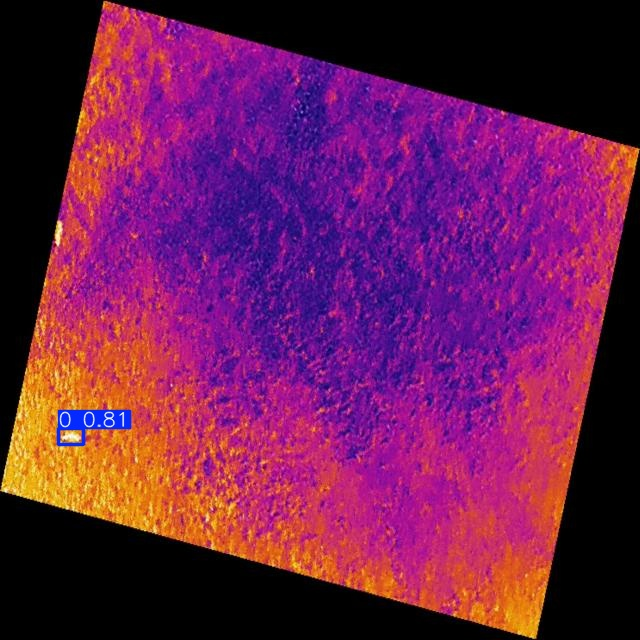

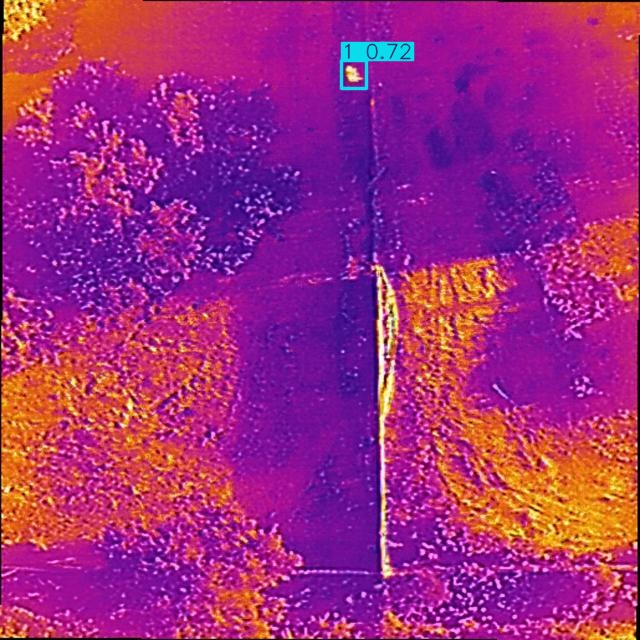

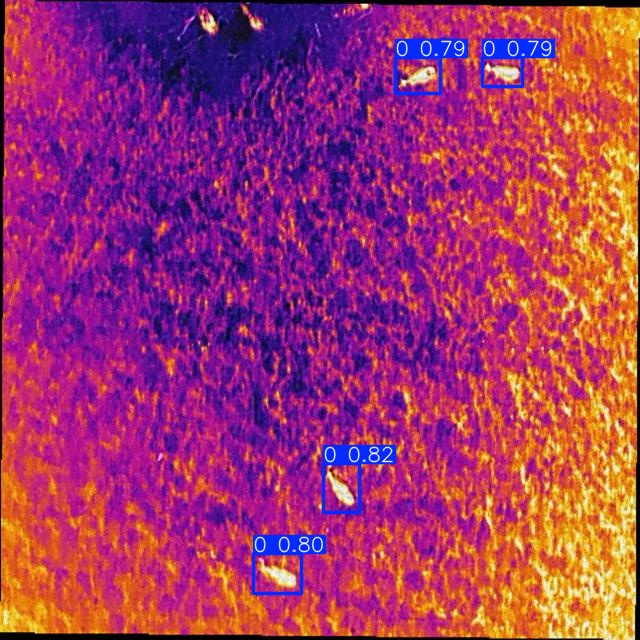

In [20]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")